In [1]:
# We are going to explore clustering as a semi-supervised learning technique.
# In this example, we will train a Logistic Regression model using only a small subset (50 samples)
# of labeled data from the digits dataset and evaluate its performance.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

# Load the digits dataset
# X_digits contains the image data (each image is 8x8 pixels flattened to 64 features)
# y_digits contains the corresponding digit labels (0 to 9)
X_digits, y_digits = load_digits(return_X_y=True)

# Split the dataset into training and testing sets
# By default, 75% of the data is used for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

# Define the number of labeled instances to use for training
n_labeled = 50

# Create and train a Logistic Regression model on only the first 50 labeled training samples
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

# Evaluate and print the accuracy of the model on the full test set
print(f"The accuracy of the Logistic Regressor is: {log_reg.score(X_test, y_test):.4f}")

The accuracy of the Logistic Regressor is: 0.8267


  File "d:\hands_on_machine_learning\C9 - Unsupervised Learning Techniques\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


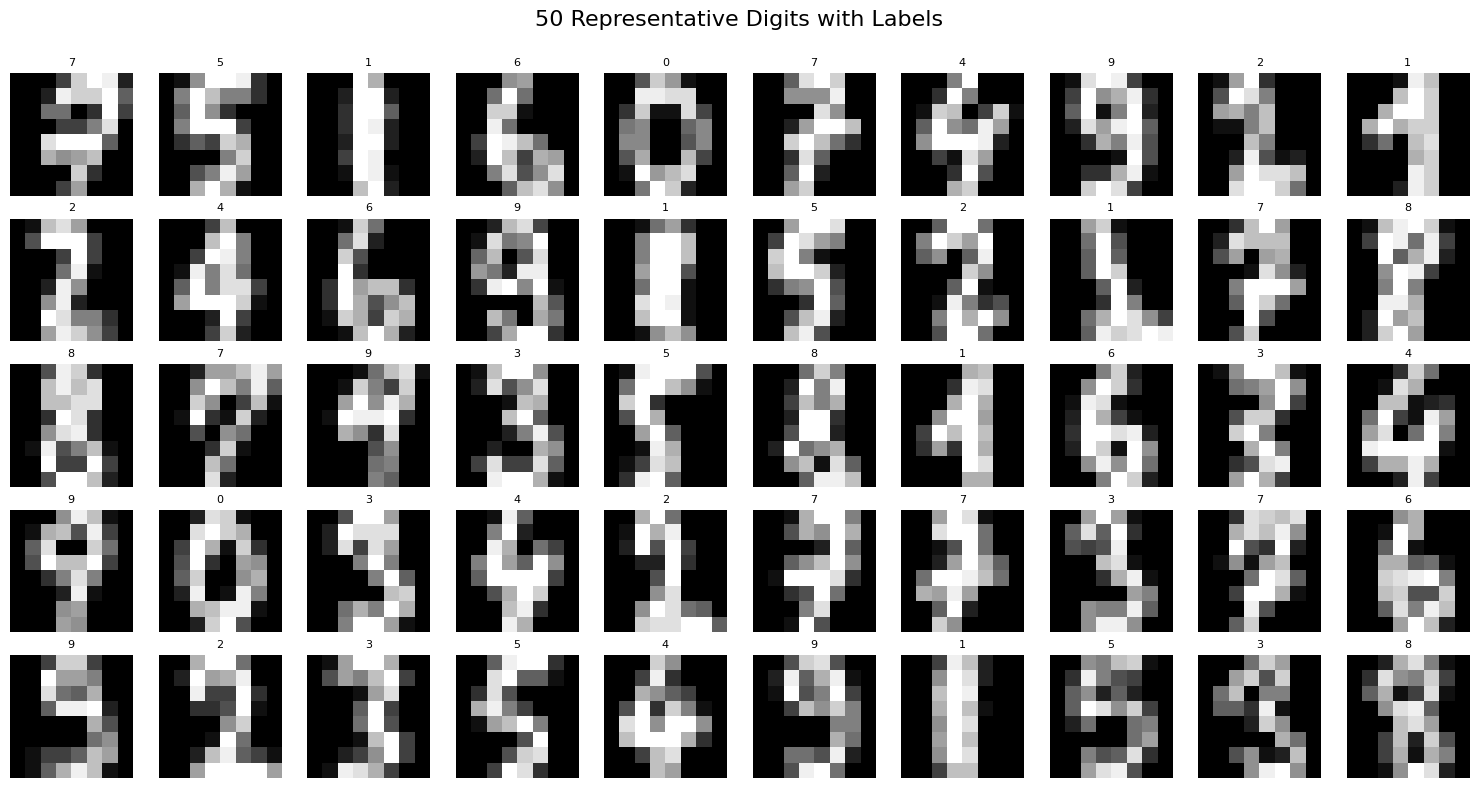

In [2]:
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Suppress convergence warnings
warnings.filterwarnings("ignore")

# Load the digits dataset
digits = load_digits()
X = digits.data  # Flattened images (n_samples, 64)
y = digits.target  # True labels
images = digits.images  # Original 8x8 images

k = 50  # Number of clusters

# Create and fit a KMeans model on the data
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X)  # Distance of each sample to each cluster center

# For each cluster, find the index of the sample closest to the centroid
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

# Get the representative images and their labels
X_representative_digits = images[representative_digit_idx]
y_representative_digits = y[representative_digit_idx]

# Plot the representative digits with their actual labels
plt.figure(figsize=(15, 8))
for idx, (image, label) in enumerate(zip(X_representative_digits, y_representative_digits)):
    plt.subplot(5, 10, idx + 1)
    plt.imshow(image, cmap="gray", interpolation='nearest')
    plt.axis("off")
    plt.title(f"{label}", fontsize=8)

plt.suptitle("50 Representative Digits with Labels", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [3]:
# Flatten the 8x8 representative images to 64 features for training
X_flat = X_representative_digits.reshape(len(X_representative_digits), -1)

# Train logistic regression on representative digits
log_reg = LogisticRegression()
log_reg.fit(X_flat, y_representative_digits)

# Evaluate
print(f"The accuracy of the Logistic Regressor is: {log_reg.score(X_test, y_test):.4f}")

The accuracy of the Logistic Regressor is: 0.9333
